<a href="https://colab.research.google.com/github/Cliff12001/IMSE-441/blob/main/Lab_2_IMSE_541.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as scipy
from scipy import stats
import scipy.stats as stats
import numpy as np
%pip install pingouin
import pingouin as pg

In [22]:
import pandas as pd
Bushing=pd.read_csv('/content/drive/MyDrive/BUSHING DIAMETER 2 BATCHES.csv')
Bushing

,Batch 1,Batch 2
0,1.001,1.000
1,1.005,1.005
2,1.015,1.015
3,1.020,1.005
4,1.010,0.990
5,1.015,1.005
6,1.000,1.015
7,1.010,1.000
8,0.999,1.005
9,1.010,0.990


Q1

In [23]:
Bushing.mean()

Batch 1    1.00336
Batch 2    1.00366
dtype: float64

In [24]:
Bushing.median()

Batch 1    1.001
Batch 2    1.005
dtype: float64

In [25]:
Bushing.std()

Batch 1    0.007714
Batch 2    0.007227
dtype: float64

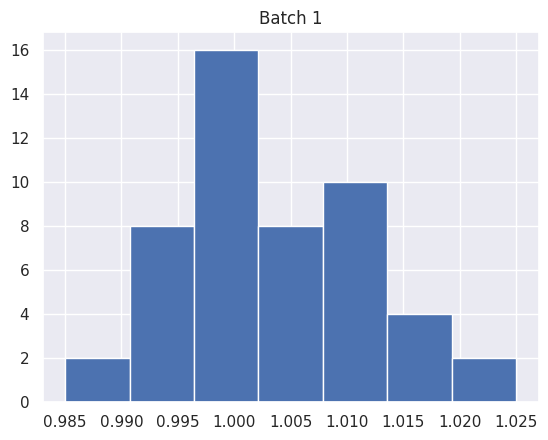

In [26]:
sns.set()
plt.title('Batch 1')
plt.hist(x=Bushing['Batch 1'], bins=7)
plt.show()

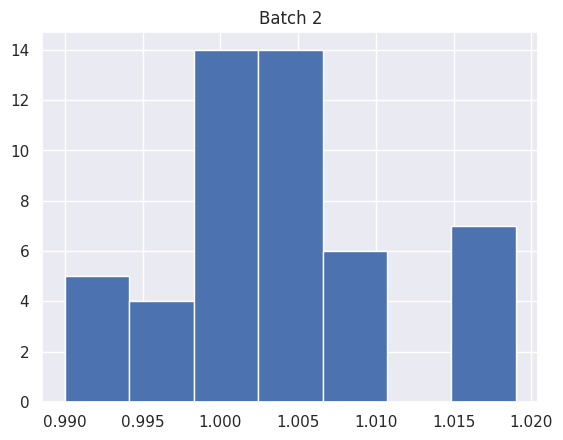

In [27]:
sns.set()
plt.title('Batch 2')
plt.hist(x=Bushing['Batch 2'], bins=7)
plt.show()

Text(0, 0.5, 'Diameter (in)')

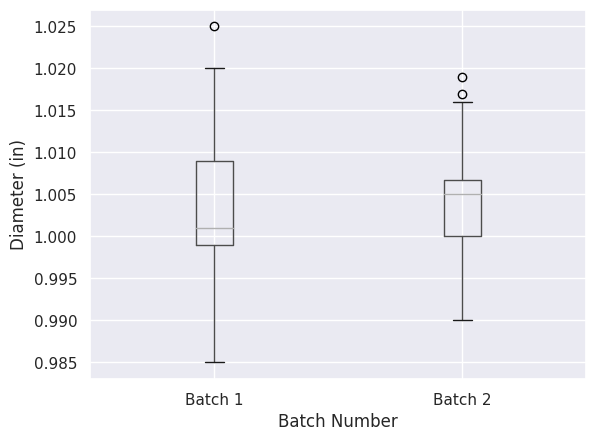

In [28]:
Bushing.boxplot()
plt.xlabel('Batch Number')
plt.ylabel('Diameter (in)')

From the descriptive statistics, histograms, and boxplot we can see that the diameter of the bushings are almost distributed equally on both sides of the mean for batch 1 and batch 2

Q2

Null hypothesis: Batch 1 variance = Batch 2 variance

Alternative Hypothesis: Batch 1 variance =/ Batch 2 variance

In [36]:
f_statistic = np.var(Bushing['Batch 1'], ddof=1) / np.var(Bushing['Batch 2'], ddof=1)
degrees_of_freedom1 = len(Bushing['Batch 1']) - 1
degrees_of_freedom2 = len(Bushing['Batch 2']) - 1
p_value = 1 - stats.f.cdf(f_statistic, degrees_of_freedom1, degrees_of_freedom2)
print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 1.1392199163691206
p-value: 0.32501448085544293


Null hypothesis: Batch 1 mean = Batch 2 mean

Alternative Hypothesis: Batch 1 mean =/ Batch 2 mean

In [37]:
t_stat, p_value = stats.ttest_ind(Bushing['Batch 1'], Bushing['Batch 2'])
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -0.20069320812014202
p-value: 0.8413543932394967


The p-values from both tests are greater than 0.05, therefore we fail to reject the null hypothesis. Which means that Batch 1 and Batch 2 are the same.

Q3 4.6

In [51]:
stats.t.cdf(-2.8,24)

0.00496459063985459

In [52]:
stats.t.cdf(-1.75,24)

0.046447544473094404

In [53]:
stats.t.cdf(-2.54,24)

0.008987349928309575

In [54]:
stats.t.cdf(-2.05,24)

0.025720976728562817

Q4 4.11

a.

In [18]:
from scipy.stats import ttest_1samp
data = np.array([13.3987, 13.3957, 13.3902, 13.4015, 13.4001, 13.3918, 13.3965, 13.3925, 13.3946, 13.4002])
ttest_1samp(data,13.4)

TtestResult(statistic=-3.0905771237069133, pvalue=0.012917430540578496, df=9)

b.

In [19]:
CI= stats.ttest_1samp(data,13.4).confidence_interval(confidence_level=0.99)
CI

ConfidenceInterval(low=13.392163154187317, high=13.400196845812685)

c.

<Axes: ylabel='Count'>

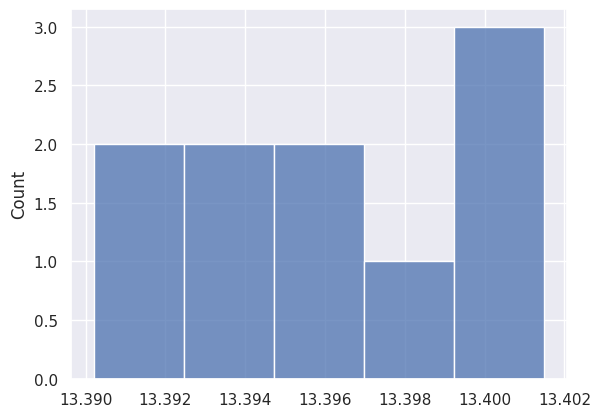

In [60]:
sns.histplot(data)

From the histogram we can see that the data doesn't have a consistent trend. From this we can see that the normailty assumption is false